# Exact Solution of the Landau-Lifshitz Equation in a Plane Wave

A Di Piazza, Lett Math Phys __83__ (2008) https://link.springer.com/article/10.1007/s11005-008-0228-9

Abstract: _The Landau–Lifshitz (The Classical Theory of Fields. Elsevier, Oxford 1975) form of the Lorentz–Abraham–Dirac equation in the presence of a plane wave of arbitrary shape and polarization is solved exactly and in closed form. The explicit solution is presented in the particular, paradigmatic cases of a constant crossed field and of a monochromatic wave with circular and with linear polarization._

Notebook by: Óscar Amaro (2023)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
import h5py
from numpy import pi, cos, sin, sqrt
from scipy.constants import alpha, c, m_e, e, epsilon_0 # physical constants

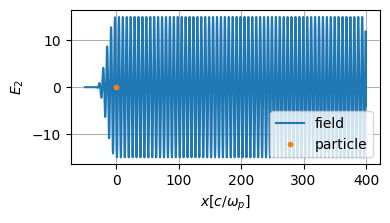

In [80]:
# load osiris simulation results: laser field and particle coordinate
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
mrkrsz = 1

files = glob.glob('simulations/MS/FLD/e2/*.h5')
files.sort()

t = int(len(files)*0.01)
filef = h5py.File(files[t], 'r')
axis1 = np.array(filef['AXIS']['AXIS1'])
xlst = np.linspace(np.min(axis1), np.max(axis1), len(np.array(filef['e2'])))
axes.plot(xlst, np.array(filef['e2']), label=r'field' )

files2 = glob.glob('simulations/MS/RAW/electrons/*.h5')
files2.sort()
filef = h5py.File(files2[t], 'r')
axes.plot( np.array(filef['x1'])[0], np.array(filef['x1'])[0]*0, '.', label=r'particle' )

axes.grid()
# aspect
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes.set_aspect(aspect=1/2/axesratio)
#axes.legend()
axes.set_xlabel(r'$x[c/\omega_p]$')
axes.set_ylabel(r'$E_2$')
axes.legend(loc='lower right')
#
plt.tight_layout()
plt.show()

In [81]:
files = glob.glob('simulations/MS/RAW/electrons/*.h5')
files.sort()
p1lst = np.zeros(len(files))
p2lst = np.zeros(len(files))
p3lst = np.zeros(len(files))
enelst = np.zeros(len(files))
for i in range(len(files)):
    filef = h5py.File(files[i], 'r')
    p1lst[i] = np.array(filef['p1'])[0]
    p2lst[i] = np.array(filef['p2'])[0]
    p3lst[i] = np.array(filef['p3'])[0]
    enelst[i] = sqrt(1+p1lst[i]**2+p2lst[i]**2+p3lst[i]**2)
tlst = np.linspace(0,40,len(p2lst))

In [82]:
# p63/260 or appendix A.8 in HAL 
g0 = 5000
a0 = 15
wL = 2*pi*c/(0.8e-6)

beta0 = sqrt(1-1/g0**2)
u0 = beta0*g0
taue = e**2/(4*pi*epsilon_0*m_e*c**3)
tau0 = 2/3*taue
rho0 = wL*g0*(1+beta0)

def hphi(phi):
    return 1 - 0.5*tau0*rho0*a0**2 * (sin(2*phi)-phi)
def I1phi(phi):
    return sin(phi) - 0.5*tau0*rho0*a0**2*phi*sin(phi) + tau0*rho0*(1-3/8*a0**2)*cos(phi) - 1/6*0.5*tau0*rho0*a0**2*cos(3*phi)
def gphi(phi):
    h = hphi(phi)
    h0 = hphi(0)
    I1 = I1phi(phi)
    return 1/h * (g0 + 0.5/h0* (h**2-1 +a0**2 * I1**2 ) )
def uzphi(phi):
    h = hphi(phi)
    return 1/h * (g0*beta0 - 0.5/h0* (h**2-1 +a0**2 * I1**2 ) )
def uxphi(phi):
    h = hphi(phi)
    return -1/h * a0 * I1phi(phi)
philst = np.linspace(0,80,400)
hlst = hphi(philst)
eneth = gphi(philst)
p2th = uxphi(philst+pi/2)

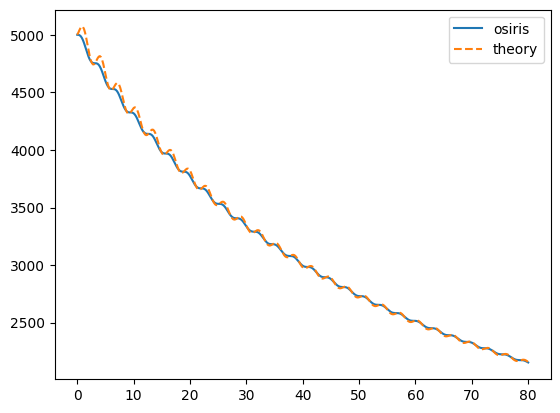

In [83]:
plt.plot(2*tlst, enelst, label=r'osiris' )
plt.plot(philst, eneth, '--', label=r'theory' )

#plt.xlim([0,2*pi])
#plt.ylim([-15,+15])
plt.legend()
plt.show()

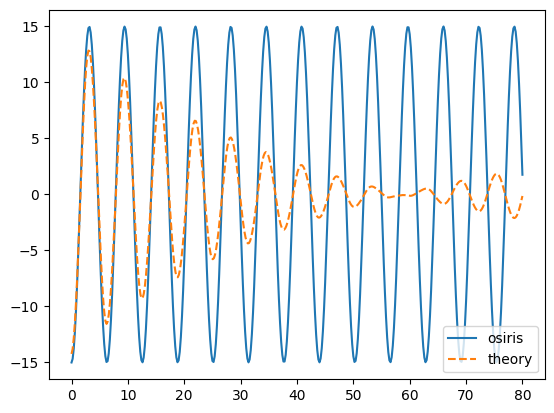

In [84]:
#plt.plot(tlst, eneth )
#plt.plot(philst, glst )
plt.plot(2*tlst, p2lst, label=r'osiris' )
plt.plot(philst, p2th, '--', label=r'theory' )


files = glob.glob('simulations/MS/FLD/e2/*.h5')
files.sort()
filef = h5py.File(files[0], 'r')
axis1 = np.array(filef['AXIS']['AXIS1'])
xlst = np.linspace(np.min(axis1), np.max(axis1), len(np.array(filef['e2'])))
#plt.plot(xlst, np.array(filef['e2']), '--', label=r'field' )

#plt.xlim([0,2*pi])
#plt.ylim([-15,+15])
plt.legend()
plt.show()